In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
brain_size = "https://raw.githubusercontent.com/Fransis96/Datasets/refs/heads/main/brain_size.csv"
data = pd.read_csv(brain_size, sep=';', na_values=".")

In [3]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [4]:
piq = data[['PIQ']]
piq.head()

,PIQ
0,124
1,124
2,150
3,128
4,134


In [5]:
piq.shape

(40, 1)

In [6]:
piq.isna().sum()

PIQ    0
dtype: int64

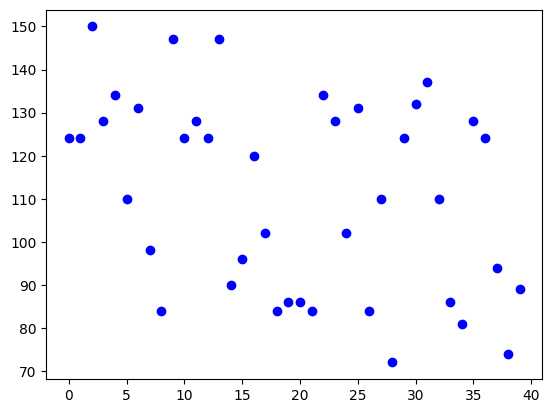

In [7]:
plt.scatter(piq.index, piq['PIQ'], c='blue')

In [8]:
fitur = piq[['PIQ']]

In [9]:
scaler = StandardScaler()
fitur_scaled = scaler.fit_transform(fitur)

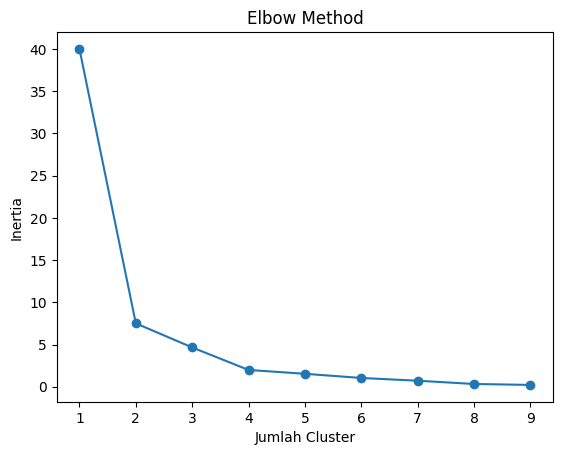

In [10]:
import os

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state=42)
    os.environ["LOKY_MAX_CPU_COUNT"] = "4"
    kmeans.fit(fitur_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [11]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(fitur)
    sil_score = silhouette_score (fitur, cluster_labels)
    db_index = davies_bouldin_score (fitur, cluster_labels) 
    print(f"k={k} Silhouette Score {sil_score:.4f}, Davies-Bouldin Index {db_index:.4f}")

k=2 Silhouette Score 0.7025, Davies-Bouldin Index 0.3562
k=3 Silhouette Score 0.6170, Davies-Bouldin Index 0.4215
k=4 Silhouette Score 0.6396, Davies-Bouldin Index 0.4507
k=5 Silhouette Score 0.5575, Davies-Bouldin Index 0.5438


In [12]:
piq = data[['PIQ']].copy()

In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)
piq['cluster'] = kmeans.fit_predict(fitur_scaled)

In [14]:
piq.head()

,PIQ,cluster
0,124,1
1,124,1
2,150,1
3,128,1
4,134,1


In [15]:
print(piq.groupby('cluster')[['PIQ', 'cluster']].mean())

                PIQ  cluster
cluster                     
0         87.764706      0.0
1        128.217391      1.0


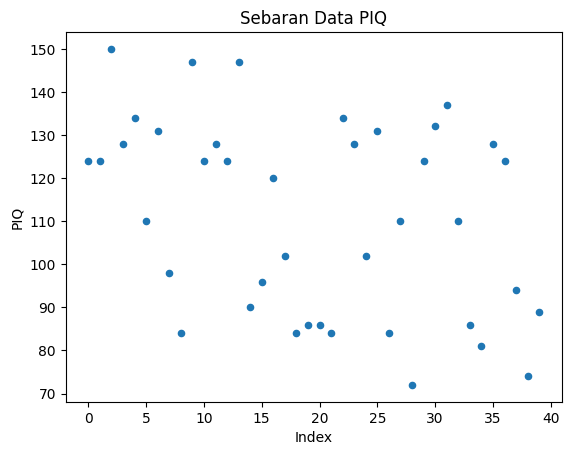

In [19]:
import matplotlib.pyplot as plt

# Scatter plot dengan indeks sebagai x dan PIQ sebagai y
plt.scatter(piq.index, piq['PIQ'], s=20)
plt.xlabel('Index')
plt.ylabel('PIQ')
plt.title('Sebaran Data PIQ')
plt.show()